<a href="https://colab.research.google.com/github/Velisca/final-project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file = "Cancer_Data.csv"
data = pd.read_csv(file)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

This Dataset has 569 rows and 33 columns

Next, I'm going to check if there are any missing values in the dataset

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Here, it's visible that under the column 'Unnamed:32', 569 missing data are found. 

Since it's not that significant, I'm going to erase that column.

In [ ]:
data.dropna(axis=1, inplace=True)

Checking if it's removed

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Now that it is removed, we can now proceed to the next step

Cancer can be divided into 2 types: Benign (harmless) and Malignant (harmful). Here I'm going to check on the types of cancer in the data

In [20]:
data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Visualizing this

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
total = len(data.diagnosis)
B = ["B" for diagnosis in data.diagnosis if "B" in diagnosis]
M = ["M" for diagnosis in data.diagnosis if "M" in diagnosis]
total_benign = len(B)
total_malignant = len(M)

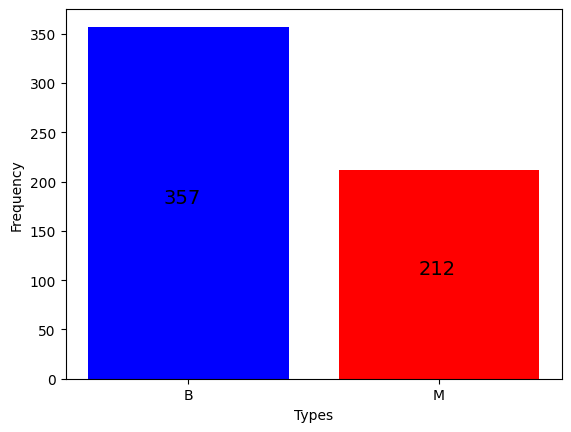

In [42]:
plt.bar(x = ["B", "M"], height = [total_benign, total_malignant], color = ['blue','red'])
plt.xlabel("Types")
plt.ylabel("Frequency")
plt.text(-0.1, total_benign/2, total_benign, fontsize=14)
plt.text(0.92, total_malignant/2, total_malignant, fontsize=14)
plt.show()

Here, we can see that 357 types of cancer are benign and 212 types of cancer are malignant.

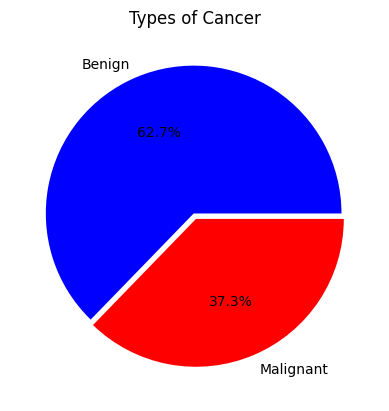

In [36]:
t = [total_benign, total_malignant]
colors = ["blue", "red"]
plt.title('Types of Cancer')
plt.pie(labels = ["Benign", "Malignant"], \
    x = t, autopct="%.1f%%", explode=[0.02]*2, colors=colors)
plt.show()

The Pie Chart above show the percentage of the corresponding types.

The normal radius of a cancer cell is 10-20 micrometers. Hence here, I'm going to classify the cells under 10 micrometers, normal size, and also above 10 micrometers.

In [37]:
data.radius_mean

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64

I'm going to find the highest radius to set the range for extra information

In [51]:
radius_max = data['radius_mean'].max()
radius_max_cancer = data[data['radius_mean'] == radius_mean]
mean = radius_mean_cancer[['diagnosis', 'radius_mean']].sort_values(by='radius_mean', ascending=False)

mean


,diagnosis,radius_mean
212,M,28.11


Next, I'm going to set the range of the low, middle and high group

In [58]:
threshold_low = 10
threshold_high = 20

# Classify groups based on the column values
low_group = data[data.radius_mean < threshold_low]
mid_group = data[(data.radius_mean >= threshold_low) & (data.radius_mean <= threshold_high)]
high_group = data[data.radius_mean > threshold_high]

After setting, I'm now going to create a pie chart to get a view of each group's frequency

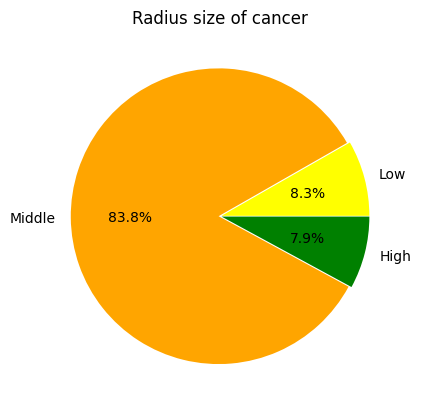

In [59]:
total_low_group = len(low_group)
total_mid_group = len(mid_group)
total_high_group = len(high_group)

sizes = [total_low_group, total_mid_group, total_high_group]
labels = ["Low", "Middle", "High"]
colors = ["yellow", "orange", "green"]

plt.title('Radius size of cancer')
plt.pie(sizes, labels=labels, autopct="%.1f%%", explode=[0.01]*3, colors=colors)
plt.show()

Below, I'm showing the specific frequency of the pie chart above

In [60]:
total_low_group = len(low_group)
total_mid_group = len(mid_group)
total_high_group = len(high_group)

print("The total number of low group: %d" % total_low_group)
print("The total number of mid group: %d" % total_mid_group)
print("The total number of high group: %d" % total_high_group)


The total number of low group: 47
The total number of mid group: 477
The total number of high group: 45


Lastly, I'm showing the respective bar graph of this data

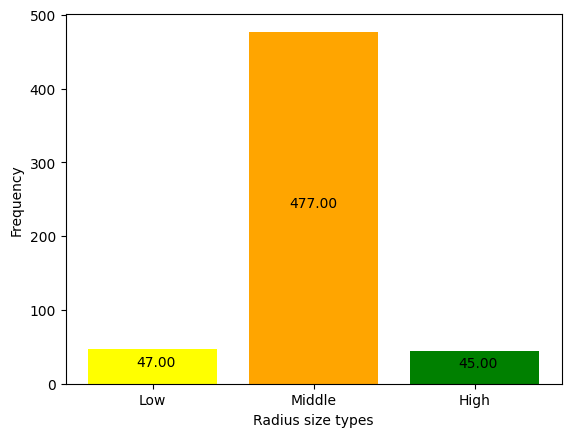

In [67]:
total_low_group = len(low_group)
total_mid_group = len(mid_group)
total_high_group = len(high_group)

sizes = [total_low_group, total_mid_group, total_high_group]
labels = ["Low", "Middle", "High"]
colors = ["yellow", "orange", "green"]

plt.bar(x = ["Low", "Middle", "High"], height = [total_low_group, total_mid_group, total_high_group], color = ['yellow','orange','green'])
plt.xlabel("Radius size types")
plt.ylabel("Frequency")
plt.text(-0.1, total_low_group/2, "{:.2f}".format(total_low_group), fontsize=10)
plt.text(0.85, total_mid_group/2, "{:.2f}".format(total_mid_group), fontsize=10)
plt.text(1.9, total_high_group/2, "{:.2f}".format(total_high_group), fontsize=10)
plt.show()